In [146]:
# # useful imports_python version 3.8.5

# import scanpy.external as sce

# import pickle as pkl
# import matplotlib.pyplot as plt
import seaborn as sns

# # from collections import defaultdict, Counter
# # import networkx as nx
# # import igraph, re, glob
# # from bbknn import bbknn
# # from geosketch import gs
# # import scrublet as scr
# # import joblib as jl
# # from datetime import datetime
# # def timestamp():
# #     return datetime.now().strftime("%y%m%d%H%M")
# # import sceleto2 as scjp

In [117]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

In [118]:
import numpy as np
import scipy as scipy
import pandas as pd

import matplotlib.pyplot as plt
# import autosklearn.classification

import scanpy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [156]:
# Load single-cell data (replace 'your_data.h5ad' with your file path)
adata = sc.read_h5ad('/data/home/jspark/WorkingData/KISTI_Data/KYURPLmerge_normHarmony_240201_woRPLEndo1_2018NatAnnot.h5ad')

# Preprocessing steps
# sc.pp.filter_cells(adata, min_counts=100)  # Filter low quality cells (adjust threshold)
# sc.pp.filter_cells(adata, missing_frac=0.5)  # Remove cells with more than 50% missing values
sc.pp.filter_genes(adata, min_cells = 50000)
sc.pp.normalize_total(adata)

# Imputation steps
# sc.imputate(adata, method='knn', k=10)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata)

In [157]:
adata.obs

,Sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_scores,predicted_doublets,group,exp,n_counts,batch,leiden,inferredCellOrigin,inferredCellOrigin2,cellstatus,tissueDese,sampleDesc,predict,max_score
NORM_ENDO2AAACCCAAGTTCCGGC,norm_Endo2,1553,1553,5386.0,152.0,2.822131,0.065703,False,normal,a,5386.0,0,0,Maternal,Maternal,singlet,Endo,normTerm,dNK1,0.986612
NORM_ENDO2AAACCCACAACGGTAG,norm_Endo2,2031,2031,5935.0,208.0,3.504633,0.052077,False,normal,a,5935.0,0,9,Maternal,Maternal,singlet,Endo,normTerm,dM2,0.999717
NORM_ENDO2AAACCCACAAGATTGA,norm_Endo2,4388,4388,32815.0,2183.0,6.652445,0.113947,False,normal,a,32815.0,0,30,Fetal,Fetal,singlet,Endo,normTerm,SCT,0.999991
NORM_ENDO2AAACCCACACAGCGCT,norm_Endo2,3994,3994,12882.0,544.0,4.222947,0.070020,False,normal,a,12882.0,0,21,Fetal,Fetal,singlet,Endo,normTerm,VCT,0.975891
NORM_ENDO2AAACCCAGTCTCTCTG,norm_Endo2,1308,1308,4185.0,38.0,0.908005,0.074648,False,normal,a,4185.0,0,30,Fetal,Fetal,singlet,Endo,normTerm,SCT,0.992683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NORM_ENDO6TTTGTTGAGAGCAGTC,norm_Endo6,828,828,1335.0,148.0,11.086142,0.020752,False,normal,b,1335.0,4,2,Fetal,Fetal,singlet,Endo,normTerm,dNK1,0.928087
NORM_ENDO6TTTGTTGAGATGCTAA,norm_Endo6,1331,1331,2184.0,6.0,0.274725,0.108491,False,normal,b,2184.0,4,4,Fetal,Fetal,singlet,Endo,normTerm,dNK3,0.672672
NORM_ENDO6TTTGTTGAGGTACCTT,norm_Endo6,1348,1348,2873.0,2.0,0.069614,0.087901,False,normal,b,2873.0,4,5,Maternal,Fetal,singlet,Endo,normTerm,dM1,0.961311
NORM_ENDO6TTTGTTGCACTGTCCT,norm_Endo6,3757,3757,11442.0,354.0,3.093865,0.037238,False,normal,b,11442.0,4,3,Fetal,Fetal,singlet,Endo,normTerm,dS2,0.952608


In [158]:
adata.var

,n_cells,highly_variable,means,dispersions,dispersions_norm
ACTB,56068,False,14.175527,24.222322,-0.661350
ACTG1,53499,False,12.906230,23.617994,1.056856
B2M,52872,False,20.339848,30.112743,-0.707107
CD63,50402,False,11.799043,21.143155,-0.587533
CFL1,50191,False,9.018503,18.564472,1.334620
...,...,...,...,...,...
TMSB10,54936,False,14.244752,24.157459,-1.214633
TMSB4X,53441,False,13.377931,22.982917,-0.553147
TPT1,56944,False,16.931766,27.704936,1.000000
UBA52,51878,False,9.498282,18.886914,0.854297


In [159]:
# sc.pl.clustermap(adata)
# sc.tl.rank_genes_groups(adata, 'Sample')
sc.tl.rank_genes_groups(adata, 'group')

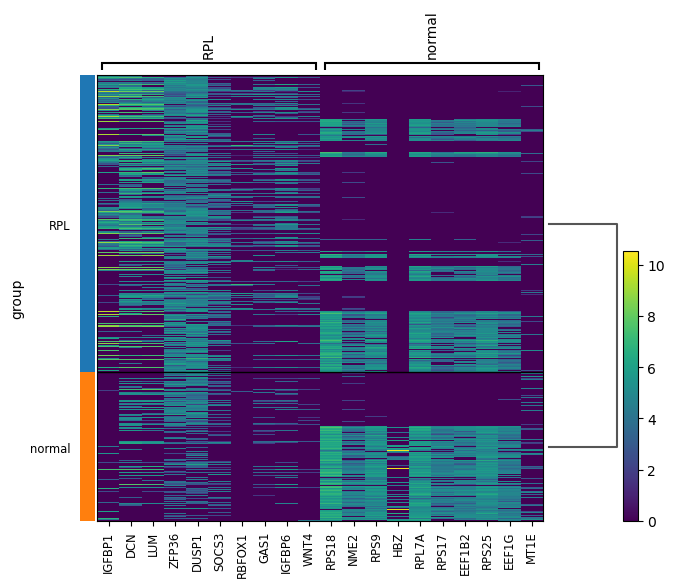

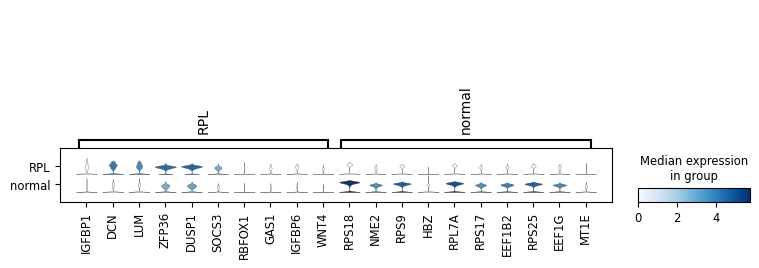

In [160]:
# sc.pl.rank_genes_groups_heatmap(adata)
# sc.pl.rank_genes_groups(adata)
sc.pl.rank_genes_groups_heatmap(adata)
sc.pl.rank_genes_groups_stacked_violin(adata)

In [123]:
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import svm

In [161]:
def prediction(X, y, model, model_name):
    # X = sub_adata.X
    # Y = sub_adata.obs['group']
    kf = KFold(n_splits=5, shuffle=True, random_state=777)
    result = list()
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_pred = model.predict(X_test)
        y_score = model.predict_proba(X_test)
        y_test_binary = pd.get_dummies(y_test)['RPL']

        acc = metrics.accuracy_score(y_test, y_pred)
        auc = metrics.roc_auc_score(y_test_binary, y_score[:,0])
        f1 = metrics.f1_score(y_test, y_pred, pos_label = 'RPL')
        
        result.append({'model':model_name, 'Accuracy':acc, 'AUROC':auc, 'F1':f1})

    return result


In [162]:
# sub_adata = adata[:, adata.var[adata.var['highly_variable']==True].index]
# sub_adata = adata[:, ['CDKN1C', 'ACADM', 'ATRNL1', 'CACNA1C', 'CDHR3', 'ANKRD46', 'CCNF']]
# sub_adata = adata[:, ['CSH1', 'NTM', 'RBFOX1', 'ADAMTS18', 'RGPD2', 'AOC1', 'ST6GALNAC5', 'G0S2', 'KRT14', 'PRL']]

In [165]:
# sub_adata = adata[adata.obs['group']=='normal', :]
# target = sub_adata.obs['inferredCellOrigin']
sub_adata = adata
target = sub_adata.obs['group']

In [166]:
result = list()
LR = LogisticRegression(max_iter=1000, solver='lbfgs')
GB = HistGradientBoostingClassifier(max_iter=1000, min_samples_leaf=1)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=777)
SVM = svm.SVC()
for model, name in [(MLP,'MLP'), (LR,'LR'), (GB,'GB')]:
    result.extend(prediction(pd.DataFrame(sub_adata.X.A), target, model, name))

/data/home/jspark/anaconda3/envs/kisti/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/data/home/jspark/anaconda3/envs/kisti/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/data/home/jspark/anaconda3/envs/kisti/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

In [167]:
pd.DataFrame(result).groupby('model').mean()

,Accuracy,AUROC,F1
model,,,
GB,0.943316,0.986706,0.957816
LR,0.851391,0.903777,0.891623
MLP,0.910697,0.955294,0.933395


<Axes: xlabel='model', ylabel='AUORC'>

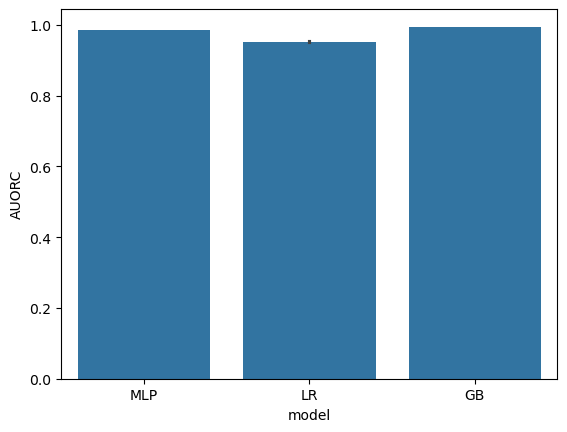

In [149]:
sns.barplot(pd.DataFrame(result), x='model', y='AUORC')

In [11]:
# # Feature Importance (Logistic Regression coefficients)
# coefs = clf.coef_.ravel()
# important_genes = sub_adata.var_names[coefs.argsort()[0:10]]  # Top 10 genes by coefficient

# # Print important genes
# print("Top 10 Most Important Genes:")
# print(important_genes)

Model Accuracy: 0.9885461947146899
AUC-ROC: 0.9991916091303931
Top 10 Most Important Genes:
Index(['IGFBP1', 'SOCS3', 'IFI6', 'RPL27A', 'TNFAIP3', 'FOSB', 'G0S2', 'FOS',
       'RPL23A', 'ZFP36'],
      dtype='object')


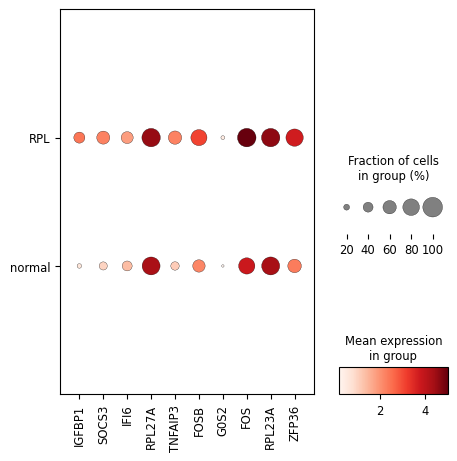

In [12]:
sc.pl.dotplot(sub_adata, important_genes, groupby='group', figsize=(5,5))

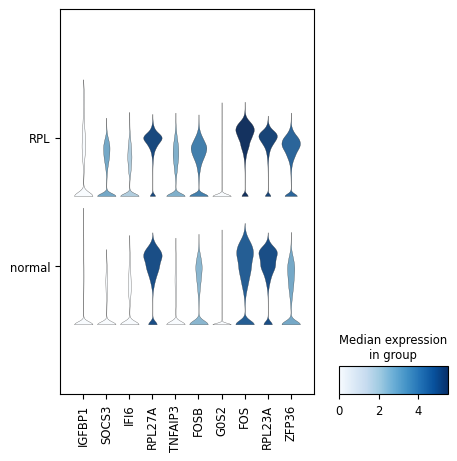

In [13]:
sc.pl.stacked_violin(sub_adata, important_genes, groupby='group', figsize=(5,5))
                         # var_group_positions=[(7, 8)], var_group_labels=important_genes)

In [ ]:
sns.heatmap(filtered_data.X)

In [ ]:
sc.pl.violin(adata, condition_by='group', genes=['IFITM1', 'POLR2J3', 'LRRC75A'], jitter=0.2, point_size=3)

# Customize the plot (optional)
plt.xlabel('Condition')
plt.ylabel('Expression (log CPM)')
plt.title('Gene Expression by Condition')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('gene_expression_plot.png')

# Display the plot
plt.show()